In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Tugas 1

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 13s 0us/step


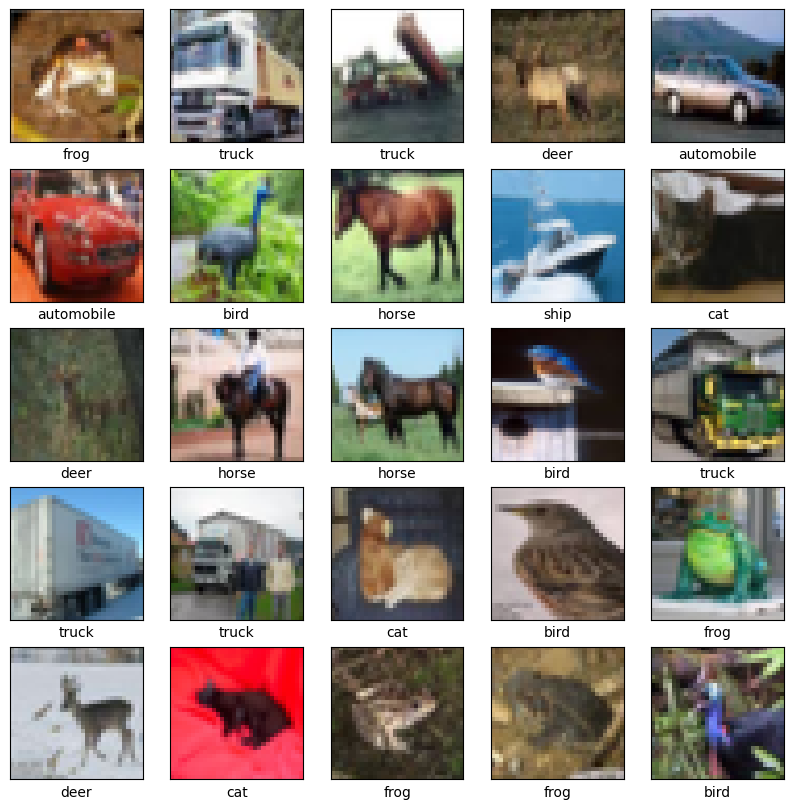

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.25))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 30s 10ms/step - loss: 1.5117 - accuracy: 0.4578 - val_loss: 1.3945 - val_accuracy: 0.5348
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0621 - accuracy: 0.6310 - val_loss: 0.9618 - val_accuracy: 0.6622
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8958 - accuracy: 0.6919 - val_loss: 0.9294 - val_accuracy: 0.6781
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7952 - accuracy: 0.7281 - val_loss: 0.7521 - val_accuracy: 0.7477
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7171 - accuracy: 0.7572 - val_loss: 0.7329 - val_accuracy: 0.7481
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6587 - accuracy: 0.7779 - val_loss: 0.6237 - val_accuracy: 0.7891
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6048 - accuracy: 0.7942 - val_loss: 0.5921 - va

313/313 - 1s - loss: 0.5570 - accuracy: 0.8181 - 949ms/epoch - 3ms/step


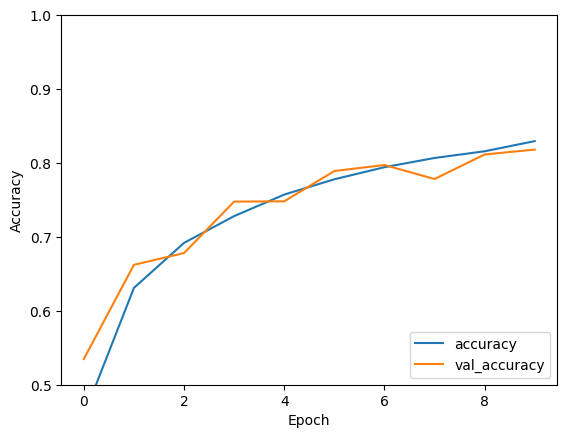

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.8180999755859375


# Tugas 2

In [12]:
import numpy as np
import pandas as pd

In [13]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [14]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


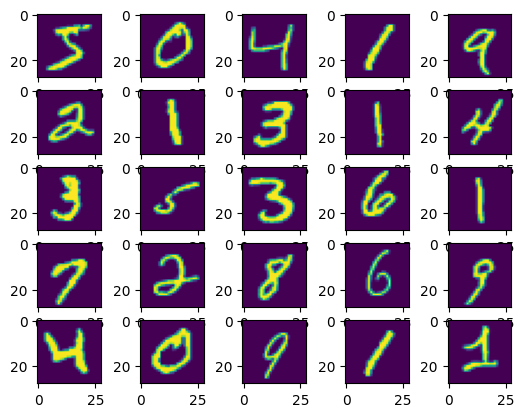

In [15]:
fig, axs = plt.subplots(5, 5)
cnt = 0
for i in range(5):
     for j in range(5):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

In [16]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.25))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 18s 10ms/step - loss: 1.5012 - accuracy: 0.4640 - val_loss: 1.2339 - val_accuracy: 0.5620
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0634 - accuracy: 0.6285 - val_loss: 1.1330 - val_accuracy: 0.6062
Epoch 3/20
1563/1563 [==============================] - 16s 11ms/step - loss: 0.9016 - accuracy: 0.6887 - val_loss: 0.7996 - val_accuracy: 0.7217
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7987 - accuracy: 0.7244 - val_loss: 0.7781 - val_accuracy: 0.7417
Epoch 5/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7285 - accuracy: 0.7514 - val_loss: 0.7999 - val_accuracy: 0.7283
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6627 - accuracy: 0.7729 - val_loss: 0.6719 - val_accuracy: 0.7752
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6109 - accuracy: 0.7910 - val_loss: 0.6742 - v

313/313 - 1s - loss: 0.5457 - accuracy: 0.8321 - 1s/epoch - 3ms/step


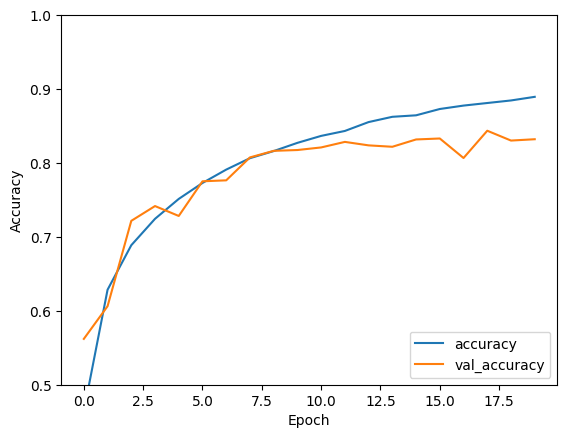

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [27]:
print(test_acc)

0.832099974155426


In [29]:
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 [==============================] - 1s 3ms/step


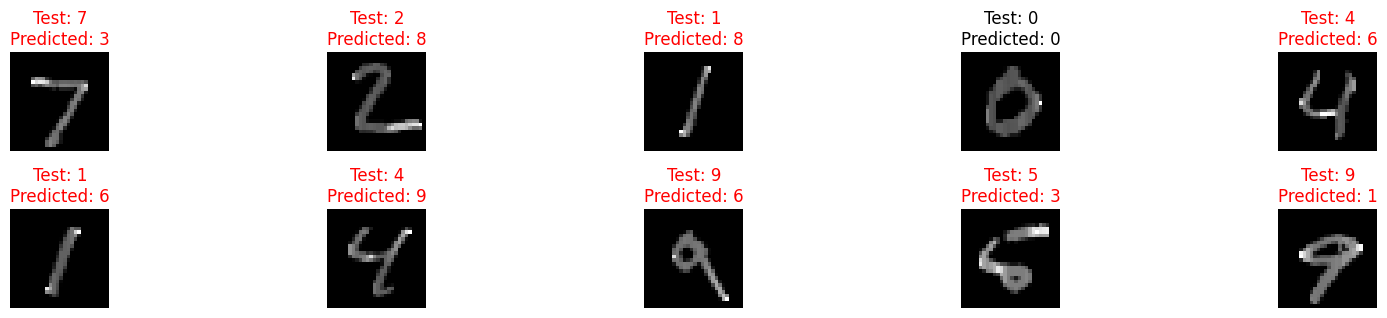

In [31]:
n_images = 10

# Ambil n_images citra dari data pengujian
sample_images = X_test[:n_images]
sample_labels = y_test[:n_images]

# Buat subplot untuk menampilkan citra-citra ini
plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')

    plt.title(f"Test: {sample_labels[i]}\nPredicted: {y_pred[i]}",
              color='black'
              if sample_labels[i] == y_pred[i]
              else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()